In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cleaned_Spotify.csv")
df.shape

(165711, 20)

In [3]:
df.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,1,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,2,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,3,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,4,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928,0.0926,108.003,0.7200,1928
4,5,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165711 entries, 0 to 165710
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        165711 non-null  int64  
 1   acousticness      165711 non-null  float64
 2   artists           165711 non-null  object 
 3   danceability      165711 non-null  float64
 4   duration_ms       165711 non-null  int64  
 5   energy            165711 non-null  float64
 6   explicit          165711 non-null  int64  
 7   id                165711 non-null  object 
 8   instrumentalness  165711 non-null  float64
 9   key               165711 non-null  int64  
 10  liveness          165711 non-null  float64
 11  loudness          165711 non-null  float64
 12  mode              165711 non-null  int64  
 13  name              165711 non-null  object 
 14  popularity        165711 non-null  int64  
 15  release_date      165711 non-null  int64  
 16  speechiness       16

In [5]:
df.describe()
df.columns

Index(['Unnamed: 0', 'acousticness', 'artists', 'danceability', 'duration_ms',
       'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness',
       'tempo', 'valence', 'year'],
      dtype='object')

In [6]:
df_features = ['acousticness','danceability','duration_ms','energy','explicit','instrumentalness','key','liveness','loudness','mode','release_date','speechiness','tempo','valence']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[df_features])
df[df_features] = scaler.transform(df[df_features])
df[df_features] = pd.DataFrame(df[df_features], columns= df_features)
df[df_features]
df_data = df[df_features] 
df_data.shape
df_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
count,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05
mean,-1.261282e-16,-4.478957e-16,-5.716448e-17,-2.945720e-16,3.284325e-15,-2.354981e-15,-1.007904e-15,-1.392142e-17,3.627683e-16,-2.237845e-15,-1.570656e-15,-4.102025e-17,7.796022e-16,-5.479977e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.307701e+00,-3.054644e+00,-1.874254e+00,-1.848972e+00,-2.835776e-01,-5.284486e-01,-1.482646e+00,-1.162363e+00,-8.657242e+00,-1.563922e+00,-2.244374e+00,-6.995441e-01,-3.810761e+00,-2.015495e+00
25%,-1.061271e+00,-6.924495e-01,-4.986069e-01,-8.377459e-01,-2.835776e-01,-5.284486e-01,-9.125517e-01,-6.085234e-01,-5.347030e-01,-1.563922e+00,-7.834238e-01,-4.105352e-01,-7.605565e-01,-8.022640e-01
50%,4.989425e-05,5.320717e-02,-1.913946e-01,-2.127456e-02,-2.835776e-01,-5.277027e-01,-5.740990e-02,-4.050719e-01,1.575255e-01,6.394181e-01,4.576422e-02,-3.285527e-01,-6.989564e-02,4.320602e-02
75%,1.047842e+00,7.305594e-01,2.562669e-01,8.251590e-01,-2.835776e-01,-2.217296e-01,7.977319e-01,3.070081e-01,7.460175e-01,6.394181e-01,8.354671e-01,-9.171435e-02,6.117474e-01,8.355973e-01
max,1.334327e+00,2.569087e+00,4.251687e+01,1.896309e+00,3.526372e+00,2.686636e+00,1.652874e+00,4.489066e+00,2.685394e+00,6.394181e-01,1.664655e+00,7.316522e+00,4.135697e+00,1.775851e+00


In [8]:
df_data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
0,1.331674,0.975317,-0.611690,-1.118642,-0.283578,1.281644,1.367826,-0.308998,-0.206974,0.639418,-1.967978,-0.280523,0.046034,0.937964
1,1.329022,-0.897363,0.403730,-1.798410,-0.283578,2.368342,0.797732,-0.731159,-3.053690,0.639418,-1.967978,-0.316959,-1.077027,-1.724698
2,0.294493,1.208690,-1.058595,-1.025010,-0.283578,-0.528449,-0.057410,-0.489843,-1.538497,-1.563922,-1.967978,6.993561,-0.321581,1.320889
3,1.331674,1.390836,-0.429862,-1.362085,-0.283578,2.323331,-1.197599,-0.535055,-0.616591,-1.563922,-1.967978,0.067282,-0.294690,0.714274
4,1.318411,-1.859317,3.738990,-1.084934,-0.283578,2.390848,1.652874,-0.608523,-0.988728,0.639418,-1.967978,-0.348427,-1.787481,-1.752754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165706,-0.848794,1.925887,-0.569325,-0.189812,3.526372,-0.528344,-1.197599,-0.658821,0.675320,0.639418,1.664655,0.484647,-0.554840,-0.855343
165707,-1.263402,1.037929,-0.539163,-0.407039,-0.283578,-0.427816,0.797732,-0.535055,0.063203,0.639418,1.664655,-0.365817,0.356318,-0.991831
165708,0.119419,-0.128938,-0.430356,0.169735,-0.283578,-0.520957,0.512685,-0.552009,0.342972,0.639418,1.664655,0.169967,0.216331,-1.435419
165709,-1.118302,0.622411,-0.540479,1.001187,-0.283578,-0.528449,-1.197599,0.092254,1.546423,0.639418,1.664655,-0.380723,0.418694,-0.225980


In [10]:
df['popularity_bi'] = [1 if x >= 50 else 0 for x in df['popularity']]
df['popularity_multi'] = [2 if x >= 50 else 1 if x >= 25 else 0 for x in df['popularity']]

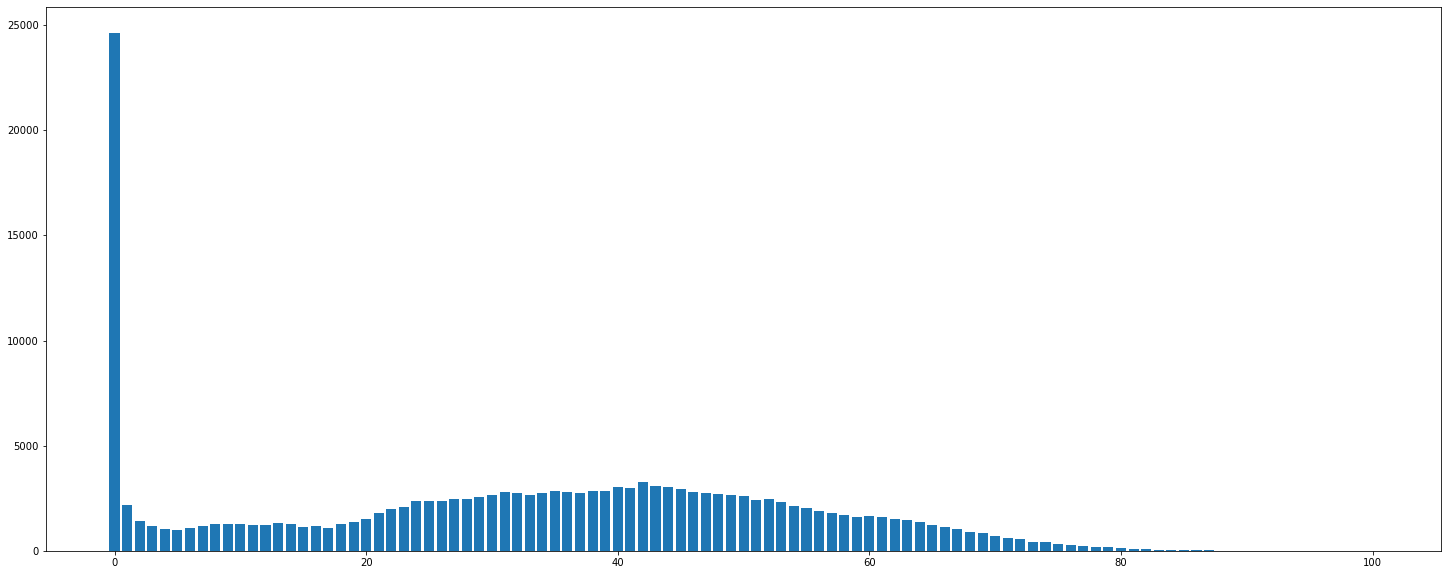

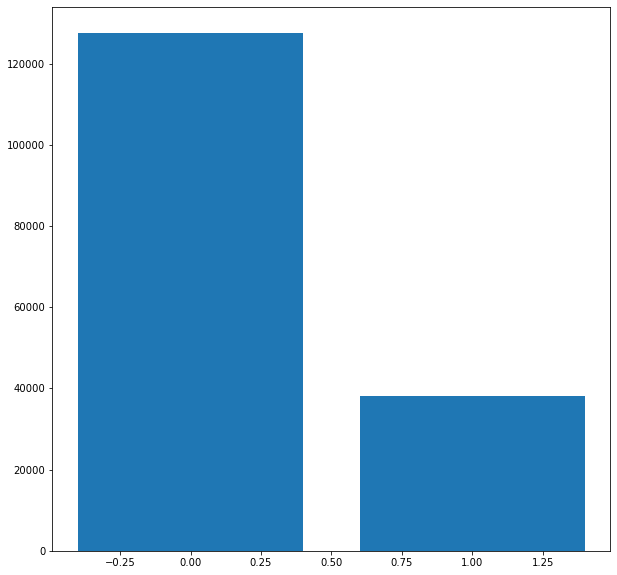

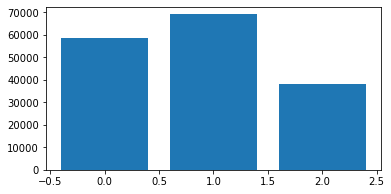

In [102]:
popularity = pd.DataFrame(df[['popularity']].value_counts())
popularity.reset_index(inplace=True)
popularity = popularity.rename(columns = {'index':'popularity', 0:"count"})

popularity_bi = pd.DataFrame(df[['popularity_bi']].value_counts())
popularity_bi.reset_index(inplace=True)
popularity_bi = popularity_bi.rename(columns = {'index':'popularity_bi', 0:"count"})

popularity_multi = pd.DataFrame(df[['popularity_multi']].value_counts())
popularity_multi.reset_index(inplace=True)
popularity_multi = popularity_multi.rename(columns = {'index':'popularity_multi', 0:"count"})


plt.figure(figsize=(25,10))
plt.bar(popularity['popularity'],popularity['count'])
plt.show()

plt.figure(figsize=(10,10))
plt.bar(popularity_bi['popularity_bi'],popularity_bi['count'])
plt.show()

plt.figure(figsize=(6,3))
plt.bar(popularity_multi['popularity_multi'],popularity_multi['count'])
plt.show()

In [12]:
df_target = df[["popularity","popularity_bi",'popularity_multi']]
print(df_target.shape)
df_target.describe()

(165711, 3)


,popularity,popularity_bi,popularity_multi
count,165711.000000,165711.000000,165711.000000
mean,32.058687,0.230468,0.877793
std,21.404763,0.421133,0.753798
min,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000
50%,34.000000,0.000000,1.000000
75%,48.000000,0.000000,1.000000
max,100.000000,1.000000,2.000000


In [13]:
# Splitting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data,df_target["popularity_bi"] , random_state = 42, test_size= 0.30, train_size = 0.60, shuffle= True)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_data,df_target["popularity_bi"] , random_state = 42, test_size= 0.10, train_size = 0.40, shuffle= True)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_data,df_target["popularity_bi"] , random_state = 42, test_size= 0.05, train_size = 0.10, shuffle= True)

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df_data,df_target["popularity_multi"] , random_state = 42, test_size= 0.30, train_size = 0.60, shuffle= True)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(df_data,df_target["popularity_multi"] , random_state = 42, test_size= 0.10, train_size = 0.40, shuffle= True)
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(df_data,df_target["popularity_multi"] , random_state = 42, test_size= 0.05, train_size = 0.10, shuffle= True)


In [14]:
print("y_test",y_test.value_counts(), "y_train", y_train.value_counts(), sep= "\n")
print("y_test_1",y_test_1.value_counts(), "y_train_1", y_train_1.value_counts(), sep= "\n")
print("y_test_2",y_test_2.value_counts(), "y_train_2", y_train_2.value_counts(), sep= "\n")
print("y_test_3",y_test_3.value_counts(), "y_train_3", y_train_3.value_counts(), sep= "\n")
print("y_test_4",y_test_4.value_counts(), "y_train_4", y_train_4.value_counts(), sep= "\n")
print("y_test_5",y_test_5.value_counts(), "y_train_5", y_train_5.value_counts(), sep= "\n")

y_test
0    38331
1    11383
Name: popularity_bi, dtype: int64
y_train
0    76530
1    22896
Name: popularity_bi, dtype: int64
y_test_1
0    12755
1     3817
Name: popularity_bi, dtype: int64
y_train_1
0    51047
1    15237
Name: popularity_bi, dtype: int64
y_test_2
0    6414
1    1872
Name: popularity_bi, dtype: int64
y_train_2
0    12738
1     3833
Name: popularity_bi, dtype: int64
y_test_3
1    20794
0    17537
2    11383
Name: popularity_multi, dtype: int64
y_train_3
1    41447
0    35083
2    22896
Name: popularity_multi, dtype: int64
y_test_4
1    6837
0    5918
2    3817
Name: popularity_multi, dtype: int64
y_train_4
1    27771
0    23276
2    15237
Name: popularity_multi, dtype: int64
y_test_5
1    3469
0    2945
2    1872
Name: popularity_multi, dtype: int64
y_train_5
1    6785
0    5953
2    3833
Name: popularity_multi, dtype: int64


### Linear SVC

In [15]:
# Linear SVC 
from sklearn.svm import LinearSVC

lr_svc = LinearSVC(random_state = 22, dual=False)

lr_svc.fit(x_train, y_train)

LinearSVC(dual=False, random_state=22)

In [16]:
from sklearn.metrics import confusion_matrix

lr_svc_predict = lr_svc.predict(x_test)

cm = confusion_matrix(y_test, lr_svc_predict, )

cm

array([[35138,  3193],
       [ 3883,  7500]], dtype=int64)

In [17]:
lr_svc.score(x_test, y_test)

0.8576658486543026

In [86]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test,lr_svc_predict))
print('Recall score:', recall_score(y_test,lr_svc_predict))
print('Accuracy score:', accuracy_score(y_test,lr_svc_predict))
print('F1 score:', f1_score(y_test,lr_svc_predict))

Precision score: 0.7013934349574488
Recall score: 0.6588772731265923
Accuracy score: 0.8576658486543026
F1 score: 0.679470918644682


### Linear SVM with GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV


linear_svc = LinearSVC(random_state = 22, dual= False)


params_svc = {'C': [0.01, 0.1, 1]}

grid_lr_svc = GridSearchCV(linear_svc, params_svc, cv = 5)

grid_lr_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(dual=False, random_state=22),
             param_grid={'C': [0.01, 0.1, 1]})

In [19]:
grid_lr_svc.best_params_

{'C': 0.01}

In [20]:
grid_lr_svc.score(x_test, y_test)

0.8576256185380375

In [93]:
grid_lr_svc_predict = grid_lr_svc.predict(x_test)
cm = confusion_matrix(y_test, grid_lr_svc_predict,normalize= 'all' )
cm

array([[0.7067828 , 0.0642475 ],
       [0.07812689, 0.15084282]])

In [87]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, grid_lr_svc_predict))
print('Recall score:', recall_score(y_test, grid_lr_svc_predict))
print('Accuracy score:', accuracy_score(y_test, grid_lr_svc_predict))
print('F1 score:', f1_score(y_test, grid_lr_svc_predict))

Precision score: 0.7012999158327878
Recall score: 0.6587894228235087
Accuracy score: 0.8576256185380375
F1 score: 0.6793803225221959


### Kernel SVM

In [22]:
from sklearn.svm import SVC

kernel_svc = SVC(random_state = 0) 

kernel_svc.fit(x_train_1, y_train_1)

SVC(random_state=0)

In [23]:
kernel_svc.score(x_test_1, y_test_1)

0.8676080135167753

In [95]:
kernel_svc_predict = kernel_svc.predict(x_test_1)
cm = confusion_matrix(y_test_1, kernel_svc_predict, normalize= 'all')
cm

array([[0.73370746, 0.03596428],
       [0.09642771, 0.13390056]])

In [94]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test_1, kernel_svc_predict))
print('Recall score:', recall_score(y_test_1, kernel_svc_predict))
print('Accuracy score:', accuracy_score(y_test_1, kernel_svc_predict))
print('F1 score:', f1_score(y_test_1, kernel_svc_predict))

Precision score: 0.7882770870337478
Recall score: 0.5813466072832068
Accuracy score: 0.8676080135167753
F1 score: 0.6691797346200242


#### Radial basis function (RBF)

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


base_svc_rbf = SVC(random_state = 0,kernel = 'rbf')

#define a list of parameters
param_svc_kernel_rbf = {'C':  [1100, 1200, 1400 ] ,
                        'gamma':  [0.005, 0.01, 0.05]} 

#apply grid search
grid_svc_rbf = GridSearchCV(base_svc_rbf, param_svc_kernel_rbf, cv = 5, n_jobs=2)

grid_svc_rbf.fit(x_train_2, y_train_2)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=2,
             param_grid={'C': [1100, 1200, 1400], 'gamma': [0.005, 0.01, 0.05]})

In [26]:
grid_svc_rbf.best_params_

{'C': 1100, 'gamma': 0.005}

In [27]:
grid_svc_rbf.score(x_test_2, y_test_2)

0.865556360125513

In [28]:
from sklearn.metrics import confusion_matrix
grid_svc_rbf_predict = grid_svc_rbf.predict(x_test_2)
cm_rbf = confusion_matrix(y_test_2, grid_svc_rbf_predict)
cm_rbf

array([[6030,  384],
       [ 730, 1142]], dtype=int64)

In [96]:
confusion_matrix(y_test_2, grid_svc_rbf_predict, normalize='all')

array([[0.72773353, 0.04634323],
       [0.08810041, 0.13782283]])

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test_2,grid_svc_rbf_predict))
print('Recall score:', recall_score(y_test_2,grid_svc_rbf_predict))
print('Accuracy score:', accuracy_score(y_test_2,grid_svc_rbf_predict))
print('F1 score:', f1_score(y_test_2,grid_svc_rbf_predict))

Precision score: 0.7483617300131061
Recall score: 0.6100427350427351
Accuracy score: 0.865556360125513
F1 score: 0.6721600941730431


#### Polynomial kernel SVM

In [30]:
base_svc_poly = SVC(random_state = 0, kernel = 'poly')

#define a list of parameters
param_svc_kernel_poly = {'C':  [10, 15, 20],
                         'degree': [2,3,4]} 

#apply grid search
grid_svc_poly = GridSearchCV(base_svc_poly, param_svc_kernel_poly, cv = 5, n_jobs=2)

grid_svc_poly.fit(x_train_2, y_train_2)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=0), n_jobs=2,
             param_grid={'C': [10, 15, 20], 'degree': [2, 3, 4]})

In [31]:
grid_svc_poly.best_params_

{'C': 15, 'degree': 3}

In [32]:
grid_svc_poly.score(x_test_2, y_test_2)

0.8674873280231716

In [33]:
grid_svc_poly_predict = grid_svc_poly.predict(x_test_2)
cm_poly = confusion_matrix(y_test_2, grid_svc_poly_predict)
cm_poly

array([[6090,  324],
       [ 774, 1098]], dtype=int64)

In [97]:
confusion_matrix(y_test_2, grid_svc_poly_predict, normalize= 'all')

array([[0.73497466, 0.0391021 ],
       [0.09341057, 0.13251267]])

In [79]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test_2, grid_svc_poly_predict))
print('Recall score:', recall_score(y_test_2, grid_svc_poly_predict))
print('Accuracy score:', accuracy_score(y_test_2, grid_svc_poly_predict))
print('F1 score:', f1_score(y_test_2, grid_svc_poly_predict))

Precision score: 0.7721518987341772
Recall score: 0.5865384615384616
Accuracy score: 0.8674873280231716
F1 score: 0.6666666666666667


In [82]:
graph = pd.DataFrame({"score_type" : ['Precision score', "Recall score", "Accuracy score", "F1 score", 'Precision score', "Recall score", "Accuracy score", "F1 score"], "score": [0.7483617300131061, 0.6100427350427351, 0.865556360125513, 0.6721600941730430, 
0.7721518987341772, 0.5865384615384616, 0.8674873280231716, 0.6666666666666667],
             "model":["svm_rbf","svm_rbf","svm_rbf","svm_rbf","svm_poly","svm_poly","svm_poly","svm_poly"]})
graph

,score_type,score,model
0,Precision score,0.748362,svm_rbf
1,Recall score,0.610043,svm_rbf
2,Accuracy score,0.865556,svm_rbf
3,F1 score,0.672160,svm_rbf
4,Precision score,0.772152,svm_poly
5,Recall score,0.586538,svm_poly
6,Accuracy score,0.867487,svm_poly
7,F1 score,0.666667,svm_poly


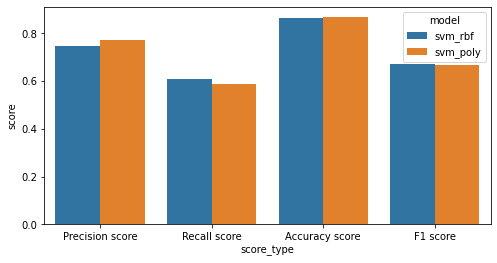

In [101]:
# Grouped bar plot with seaborn
import seaborn as sns
fig2 = plt.figure(figsize=(8, 4))
sns.barplot(y='score',x='score_type',hue='model',data= graph);

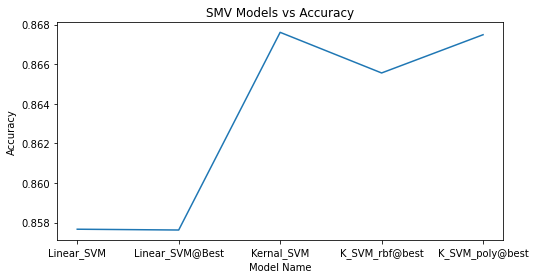

In [100]:
x_axis = ["Linear_SVM", "Linear_SVM@Best", "Kernal_SVM", "K_SVM_rbf@best","K_SVM_poly@best"]
y_axis = [0.8576658486543026, 0.8576256185380375, 0.8676080135167753, 0.865556360125513, 0.8674873280231716]
fig1 = plt.figure(figsize=(8, 4))
plt.plot(x_axis, y_axis)
plt.title("SMV Models vs Accuracy")
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

### Multiclass Classification with SVM

In [31]:
lr_svc_multi = LinearSVC(random_state = 22,dual = False ,multi_class='ovr' )
lr_svc_multi.fit(x_train_3, y_train_3)

LinearSVC(dual=False, random_state=22)

In [33]:
lr_svc_multi_predict = lr_svc_multi.predict(x_test_3)
cm_lr_multi = confusion_matrix(y_test_3, lr_svc_multi_predict)
cm_lr_multi

array([[15703,  1788,    46],
       [ 3058, 14821,  2915],
       [  334,  4927,  6122]], dtype=int64)

In [34]:
lr_svc_multi.score(x_test_3, y_test_3)

0.7371364203242547

### Multiclass Classificaion with Linear SVM

In [35]:
linear_svc_multi = LinearSVC(random_state = 22, dual= False)

params_svc_multi = {'C': [0.1, 0.5, 1]}

grid_lr_svc_multi = GridSearchCV(linear_svc_multi, params_svc_multi, cv = 5, n_jobs = 2)

grid_lr_svc_multi.fit(x_train_3, y_train_3)

GridSearchCV(cv=5, estimator=LinearSVC(dual=False, random_state=22), n_jobs=2,
             param_grid={'C': [0.1, 0.5, 1]})

In [36]:
grid_lr_svc_multi.best_params_

{'C': 0.5}

In [37]:
grid_lr_svc_multi.score(x_test_3, y_test_3)

0.7371565353823872

In [38]:
grid_lr_svc_multi_predict = grid_lr_svc_multi.predict(x_test_3)
cm_lr_multi = confusion_matrix(y_test_3, grid_lr_svc_multi_predict)
cm_lr_multi

array([[15703,  1788,    46],
       [ 3057, 14822,  2915],
       [  334,  4927,  6122]], dtype=int64)

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
base_svc_multi_rbf = SVC(random_state = 0,kernel = 'rbf', decision_function_shape = 'ovo' )

#define a list of parameters
param_svc_multi_kernel_rbf = {'C':  [50, 100, 1000] ,
                        'gamma':  [0.001, 0.005,0.01]} 

#apply grid search
grid_svc_multi_rbf = GridSearchCV(base_svc_multi_rbf, param_svc_multi_kernel_rbf, cv = 5, n_jobs=2)

grid_svc_multi_rbf.fit(x_train_5, y_train_5)

GridSearchCV(cv=5, estimator=SVC(decision_function_shape='ovo', random_state=0),
             n_jobs=2,
             param_grid={'C': [50, 100, 1000], 'gamma': [0.001, 0.005, 0.01]})

In [40]:
grid_svc_multi_rbf.best_params_

{'C': 50, 'gamma': 0.01}

In [41]:
grid_svc_multi_rbf.score(x_test_5, y_test_5)

0.7828867970069998

In [42]:
grid_svc_multi_rbf_predict = grid_svc_multi_rbf.predict(x_test_5)
cm_multi_rbf = confusion_matrix(y_test_5, grid_svc_multi_rbf_predict)
cm_multi_rbf

array([[2544,  390,   11],
       [ 309, 2790,  370],
       [  33,  686, 1153]], dtype=int64)

In [ ]:
# End of the SVM